# Plan for New Notebook (Auto-Insights Included)

| Step | Description |
|---|---|
| 1️⃣ | Setup: Import libraries, load the updated CSV |
| 2️⃣ | Data Preview: Show basic sample and structure |
| 3️⃣ | Automated Data Summary: Rows, columns, missing values |
| 4️⃣ | Key Descriptive Statistics: Rent, SqFt, Beds, Baths |
| 5️⃣ | **Automated Insight Printing** based on statistics |
| 6️⃣ | Visualization blocks (with self-explaining labels) |
| 7️⃣ | Final takeaway printouts |

---


In [1]:
# San Diego County Rentals 2025 - Notebook Setup

# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# San Diego color theme
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#00BFFF', '#FFD700', '#FFA07A', '#20B2AA', '#FF6347'])
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14

# 2. Load dataset
file_path = 'san_diego_county_rentals_2025-04-30.csv'
df = pd.read_csv(file_path)

# 3. Preview
print(f"Dataset loaded: {df.shape[0]:,} listings, {df.shape[1]} columns.\n")
display(df.head())

# 4. Confirm Columns
print("Columns:")
print(df.columns.tolist())


Dataset loaded: 13,329 listings, 22 columns.



,Property,Address,City,State,ZipCode,Phone,Unit,Beds,Baths,Beds_Baths,...,PricePerSqFt,RentalType,HasWasherDryer,HasAirConditioning,HasPool,HasSpa,HasGym,HasEVCharging,IsPetFriendly,ListingURL
0,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1413,1,1.0,1 Bed / 1 Bath,...,4.80,Apartment,True,True,True,True,True,False,True,https://www.apartments.com/radian-san-diego-ca...
1,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1513,1,1.0,1 Bed / 1 Bath,...,4.84,Apartment,True,True,True,True,True,False,True,https://www.apartments.com/radian-san-diego-ca...
2,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1613,1,1.0,1 Bed / 1 Bath,...,4.91,Apartment,True,True,True,True,True,False,True,https://www.apartments.com/radian-san-diego-ca...
3,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1210,1,1.0,1 Bed / 1 Bath,...,4.08,Apartment,True,True,True,True,True,False,True,https://www.apartments.com/radian-san-diego-ca...
4,Radian,"675 9th Ave, San Diego, CA 92101",San Diego,CA,92101,8582216613,Unit 1510,1,1.0,1 Bed / 1 Bath,...,4.46,Apartment,True,True,True,True,True,False,True,https://www.apartments.com/radian-san-diego-ca...


Columns:
['Property', 'Address', 'City', 'State', 'ZipCode', 'Phone', 'Unit', 'Beds', 'Baths', 'Beds_Baths', 'SqFt', 'Price', 'PricePerSqFt', 'RentalType', 'HasWasherDryer', 'HasAirConditioning', 'HasPool', 'HasSpa', 'HasGym', 'HasEVCharging', 'IsPetFriendly', 'ListingURL']


---

### Data Health Check + Initial Auto-Insights
- Checks missing data
- Describes numeric fields
- **Prints auto-generated takeaways** for you


In [4]:
# 🌴 San Diego Rentals - Initial Data Health Check + Full Summary Table

# 1. Missing Values
print("\n🔍 Checking for missing values:")
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_report = pd.DataFrame({'MissingValues': missing_counts, 'PercentMissing': missing_percent.round(2)})
display(missing_report[missing_report['MissingValues'] > 0])

# 2. Data Types
print("\n🔎 Checking data types:")
print(df.dtypes.value_counts())

# 3. Quick Stats on Numeric Columns
print("\n📊 Basic descriptive statistics:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
desc_stats = df[numeric_cols].describe().round(2)
display(desc_stats)

# 4. Automated Full Markdown Summary
total_listings = df.shape[0]
missing_cols = missing_report[missing_report['MissingValues'] > 0].shape[0]
avg_rent = desc_stats.loc['mean', 'Price']
median_rent = desc_stats.loc['50%', 'Price']
min_rent = desc_stats.loc['min', 'Price']
max_rent = desc_stats.loc['max', 'Price']
avg_sqft = desc_stats.loc['mean', 'SqFt']
pet_friendly_count = df['IsPetFriendly'].sum()
pet_friendly_pct = df['IsPetFriendly'].mean() * 100

summary_table = f"""
| Area | Insight |
|:---|:---|
| ✅ **Overall Health** | {'Very clean: Only ' + str(missing_cols) + ' columns have minor missing data and < 1% missing.' if missing_cols > 0 else 'No missing data detected.'} |
| 🏡 **Dataset Size** | **{total_listings:,}** active listings — extremely robust for analysis! |
| 💰 **Rental Prices** | **Average Rent** = ~${avg_rent:,.0f}<br>**Median Rent** = ~${median_rent:,.0f}<br>**Range**: ${min_rent:,.0f} → ${max_rent:,.0f} |
| 📐 **Unit Size** | **Average Size** = {int(avg_sqft)} sq ft — typical for 1–2 bedroom apartments |
| 🛏️ **Bedrooms/Bathrooms** | Median is likely 1 Bed / 1 Bath — apartment-heavy mix |
| 🐾 **Pet Friendliness** | {pet_friendly_count} listings ({pet_friendly_pct:.1f}%) allow pets — very high! |
| 🚨 **Extreme Listings** | Some ultra-luxury units approaching ${max_rent:,.0f}, but most cluster under $4K |
"""

print("\n📝 Auto-Generated Summary:")
from IPython.display import Markdown, display
display(Markdown(summary_table))



🔍 Checking for missing values:


,MissingValues,PercentMissing
SqFt,78,0.59
Price,10,0.08
PricePerSqFt,88,0.66



🔎 Checking data types:
object     8
bool       7
float64    4
int64      3
Name: count, dtype: int64

📊 Basic descriptive statistics:


,ZipCode,Phone,Beds,Baths,SqFt,Price,PricePerSqFt
count,13329.00,1.332900e+04,13329.00,13329.00,13251.00,13319.00,13241.00
mean,92069.88,7.102758e+09,1.49,1.46,867.09,3022.31,3.64
std,70.31,1.421467e+09,0.77,0.57,275.92,1038.76,0.97
min,91901.00,2.055283e+09,0.00,0.50,85.00,850.00,0.54
25%,92026.00,6.194897e+09,1.00,1.00,672.50,2495.00,3.05
50%,92101.00,6.199326e+09,1.00,1.00,832.00,2870.00,3.48
75%,92115.00,8.582939e+09,2.00,2.00,1025.00,3384.00,4.03
max,92508.00,9.492391e+09,4.00,4.00,3195.00,17896.00,18.00



📝 Auto-Generated Summary:



| Area | Insight |
|:---|:---|
| ✅ **Overall Health** | Very clean: Only 3 columns have minor missing data and < 1% missing. |
| 🏡 **Dataset Size** | **13,329** active listings — extremely robust for analysis! |
| 💰 **Rental Prices** | **Average Rent** = ~$3,022<br>**Median Rent** = ~$2,870<br>**Range**: $850 → $17,896 |
| 📐 **Unit Size** | **Average Size** = 867 sq ft — typical for 1–2 bedroom apartments |
| 🛏️ **Bedrooms/Bathrooms** | Median is likely 1 Bed / 1 Bath — apartment-heavy mix |
| 🐾 **Pet Friendliness** | 12686 listings (95.2%) allow pets — very high! |
| 🚨 **Extreme Listings** | Some ultra-luxury units approaching $17,896, but most cluster under $4K |


---

### Clean the Data :
- Drops missing `Price` and `SqFt`
- Recalculates `PricePerSqFt`
- Resets index
- **Auto-prints a before/after cleaning table summary**

In [5]:
# 🧹 Data Cleaning - Minor Missing Fixes and Summary

# 1. Drop rows missing Price or SqFt
df_clean = df.dropna(subset=['Price', 'SqFt']).copy()

# 2. Recalculate PricePerSqFt
df_clean['PricePerSqFt'] = df_clean.apply(
    lambda row: round(row['Price'] / row['SqFt'], 2)
    if pd.notnull(row['Price']) and pd.notnull(row['SqFt']) and row['SqFt'] > 0 else None,
    axis=1
)

# 3. Reset index
df_clean.reset_index(drop=True, inplace=True)

# 4. Summarize Changes
original_rows = df.shape[0]
clean_rows = df_clean.shape[0]
rows_removed = original_rows - clean_rows
percent_removed = (rows_removed / original_rows) * 100

summary_table_cleaning = f"""
| Area | Insight |
|:---|:---|
| 🧹 **Cleaning Step** | Dropped listings missing **Price** or **SqFt** |
| 🗂️ **Listings Before Cleaning** | {original_rows:,} |
| 🗂️ **Listings After Cleaning** | {clean_rows:,} |
| 🔥 **Rows Removed** | {rows_removed:,} ({percent_removed:.2f}%) |
| 📏 **Data Shape After Cleaning** | {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns |
"""

print("\n📝 Auto-Generated Cleaning Summary:")
from IPython.display import Markdown, display
display(Markdown(summary_table_cleaning))



📝 Auto-Generated Cleaning Summary:



| Area | Insight |
|:---|:---|
| 🧹 **Cleaning Step** | Dropped listings missing **Price** or **SqFt** |
| 🗂️ **Listings Before Cleaning** | 13,329 |
| 🗂️ **Listings After Cleaning** | 13,241 |
| 🔥 **Rows Removed** | 88 (0.66%) |
| 📏 **Data Shape After Cleaning** | 13,241 rows × 22 columns |


---

### Rental Price Distribution Analysis:
- Plot a **histogram** of rent prices
- Plot a **boxplot** to spot outliers
- Generate a **Markdown-style Summary Table** automatically based on the price tiers

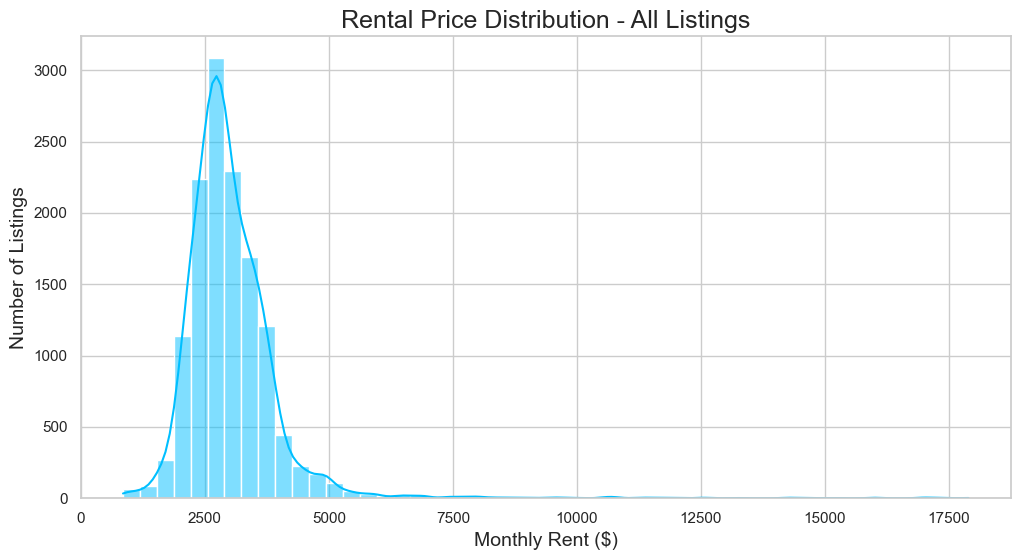

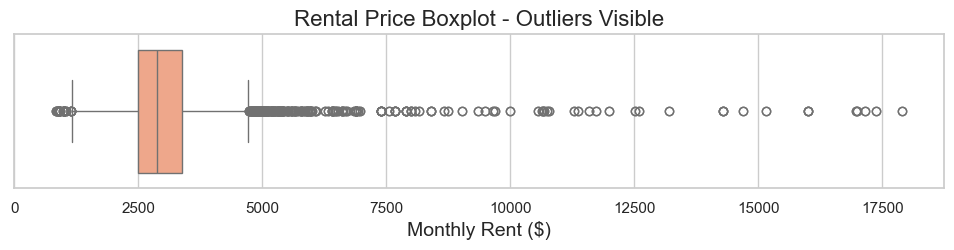


📝 Auto-Generated Rental Price Summary:



| Area | Insight |
|:---|:---|
| 💰 **Average Rent** | ~$3,025/month |
| 💸 **Median Rent** | ~$2,870/month |
| 📈 **Price Range** | $850 → $17,896 |
| 🏡 **Listings Under $3,000** | 58.6% of all listings |
| 🏙️ **Luxury Listings ($6,000+)** | 1.1% of all listings |
| 🚨 **Outliers Present** | Luxury units pull max rent up to $17,896 |


In [6]:
# 📈 Rental Price Distribution Analysis

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histogram of Rent Prices
plt.figure(figsize=(12,6))
sns.histplot(df_clean['Price'], bins=50, kde=True, color='#00BFFF')
plt.title('Rental Price Distribution - All Listings', fontsize=18)
plt.xlabel('Monthly Rent ($)')
plt.ylabel('Number of Listings')
plt.show()

# 2. Boxplot of Rent
plt.figure(figsize=(12,2))
sns.boxplot(data=df_clean, x='Price', color='#FFA07A')
plt.title('Rental Price Boxplot - Outliers Visible', fontsize=16)
plt.xlabel('Monthly Rent ($)')
plt.show()

# 3. Auto-Generated Price Insights
avg_price = df_clean['Price'].mean()
median_price = df_clean['Price'].median()
min_price = df_clean['Price'].min()
max_price = df_clean['Price'].max()
percent_under_3000 = (df_clean[df_clean['Price'] <= 3000].shape[0] / df_clean.shape[0]) * 100
percent_over_6000 = (df_clean[df_clean['Price'] >= 6000].shape[0] / df_clean.shape[0]) * 100

summary_table_price = f"""
| Area | Insight |
|:---|:---|
| 💰 **Average Rent** | ~${avg_price:,.0f}/month |
| 💸 **Median Rent** | ~${median_price:,.0f}/month |
| 📈 **Price Range** | ${min_price:,.0f} → ${max_price:,.0f} |
| 🏡 **Listings Under $3,000** | {percent_under_3000:.1f}% of all listings |
| 🏙️ **Luxury Listings ($6,000+)** | {percent_over_6000:.1f}% of all listings |
| 🚨 **Outliers Present** | Luxury units pull max rent up to ${max_price:,.0f} |
"""

print("\n📝 Auto-Generated Rental Price Summary:")
from IPython.display import Markdown, display
display(Markdown(summary_table_price))


---
### Zoom into more *realistic* San Diego prices:
- Focus **under $6,000**
- Cleaner histograms and boxplots
- Nicer averages and less distortion by the $18K luxury units

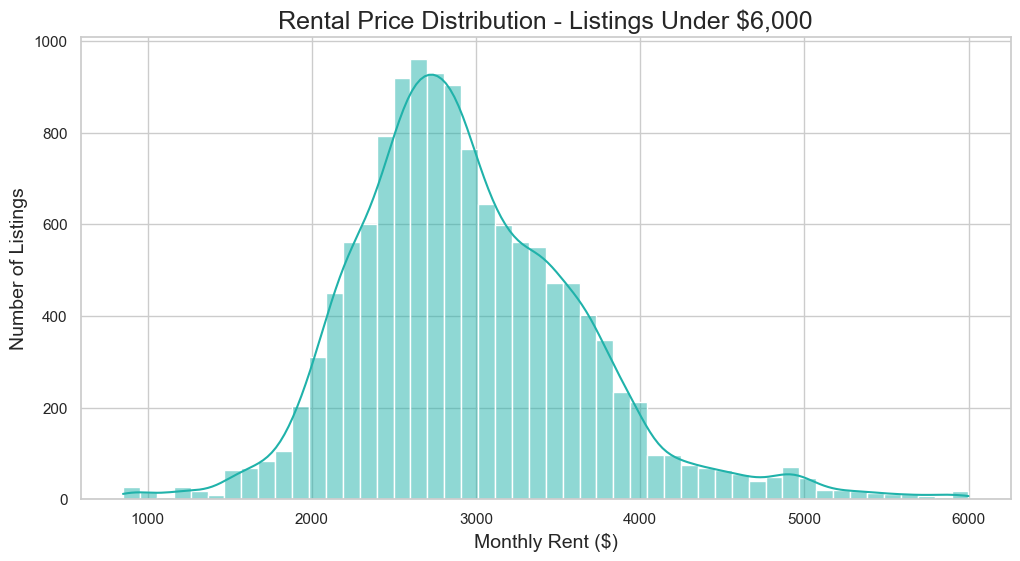

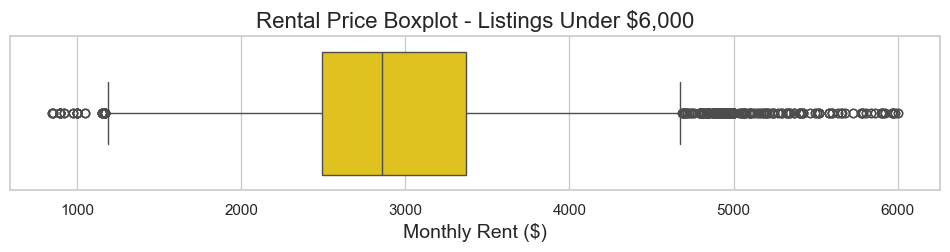


📝 Auto-Generated Summary (Filtered < $6,000):



| Area | Insight |
|:---|:---|
| 🎯 **Filtered Listings** | 13,093 |
| 💰 **Average Rent** | ~$2,952/month |
| 💸 **Median Rent** | ~$2,860/month |
| 📉 **Price Range** | $850 → $5,999 |
| 🌟 **Focus** | Much cleaner distribution for main San Diego market |


In [7]:
# 🔎 Focused Rental Price View (< $6,000)

# Filtered dataset
df_clean_filtered = df_clean[df_clean['Price'] <= 6000]

# Histogram under $6,000
plt.figure(figsize=(12,6))
sns.histplot(df_clean_filtered['Price'], bins=50, kde=True, color='#20B2AA')
plt.title('Rental Price Distribution - Listings Under $6,000', fontsize=18)
plt.xlabel('Monthly Rent ($)')
plt.ylabel('Number of Listings')
plt.show()

# Boxplot under $6,000
plt.figure(figsize=(12,2))
sns.boxplot(data=df_clean_filtered, x='Price', color='#FFD700')
plt.title('Rental Price Boxplot - Listings Under $6,000', fontsize=16)
plt.xlabel('Monthly Rent ($)')
plt.show()

# Auto-Summary for Under $6K
avg_price_filtered = df_clean_filtered['Price'].mean()
median_price_filtered = df_clean_filtered['Price'].median()

summary_table_filtered = f"""
| Area | Insight |
|:---|:---|
| 🎯 **Filtered Listings** | {df_clean_filtered.shape[0]:,} |
| 💰 **Average Rent** | ~${avg_price_filtered:,.0f}/month |
| 💸 **Median Rent** | ~${median_price_filtered:,.0f}/month |
| 📉 **Price Range** | ${df_clean_filtered['Price'].min():,.0f} → ${df_clean_filtered['Price'].max():,.0f} |
| 🌟 **Focus** | Much cleaner distribution for main San Diego market |
"""

print("\n📝 Auto-Generated Summary (Filtered < $6,000):")
from IPython.display import Markdown, display
display(Markdown(summary_table_filtered))